In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings

In [3]:
plt.rc('font', size=14)
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)
warnings.simplefilter(action='ignore')

In [4]:
train_df= pd.read_csv('Train.csv')

In [5]:
test_df= pd.read_csv('test.csv')

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
 test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [10]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
train_df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [13]:
print(train_df.shape)

(891, 12)


In [14]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
train_df['Survived'].unique()

array([0, 1], dtype=int64)

In [16]:
train_df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [17]:
train_df['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [18]:
train_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [19]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [20]:
# This Line shows the sum of all the null or missing values!

In [21]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

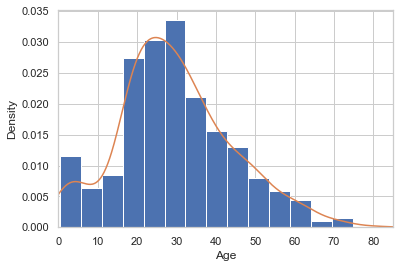

In [22]:
ax=train_df['Age'].hist(bins=15,density=True)
train_df['Age'].plot(kind='density')
ax.set(xlabel='Age')
plt.xlim(0,85)
plt.show()

In [23]:
train_df['Age'].mean()

29.69911764705882

In [24]:
train_df['Age'].mean(skipna=True)

29.69911764705882

In [25]:
train_df['Age'].median()

28.0

In [26]:
train_df['Age'].mean(skipna=True)

29.69911764705882

In [27]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
train_df['Embarked'].isnull().sum()

2

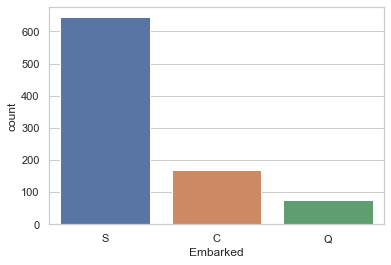

In [29]:
sns.countplot(x='Embarked', data=train_df)
plt.show()

In [30]:
train_data= train_df.copy()

In [31]:
# This will clean the age columns data

In [32]:
train_data['Age'].fillna(train_df['Age'].median(skipna=True), inplace=True)

In [33]:
train_data['Age'].isnull().sum()

0

In [34]:
# Cleaning the Embarked data by filling the 2 null values with the most frequent data value.

In [35]:
train_data['Embarked'].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)

In [36]:
train_data['Embarked'].isnull().sum()

0

In [37]:
# dropping the unwanted row cabin from the dataset

In [38]:
train_data.drop('Cabin', inplace=True, axis=1)

In [39]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [40]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [41]:
# From the dataset column sibsp and parch relates to the fact of whether the traveller is alone or with family, so we can
# combine both of them into one column 'TravelAlone', this can be 1 or 0

In [42]:
train_data['TravelAlone']= np.where((train_data["SibSp"]+train_data['Parch'])>0,0,1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

In [43]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1


In [44]:
# Creating categorical variables for gender, embarked and Pclasss in the dataset

In [45]:

training= pd.get_dummies(train_data, columns=['Sex','Embarked','Pclass'])

In [46]:
training

,PassengerId,Survived,Name,Age,Ticket,Fare,TravelAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,0,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,0,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,1,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,0,1,0,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,373450,8.0500,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,211536,13.0000,1,0,1,0,0,1,0,1,0
887,888,1,"Graham, Miss. Margaret Edith",19.0,112053,30.0000,1,1,0,0,0,1,1,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,W./C. 6607,23.4500,0,1,0,0,0,1,0,0,1
889,890,1,"Behr, Mr. Karl Howell",26.0,111369,30.0000,1,0,1,1,0,0,1,0,0


In [1]:
# as any one sex value can be used to understand the sex so we can remove one sex column

In [48]:
training.drop('Sex_female', axis=1, inplace=True)

In [49]:
training.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,TravelAlone,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,0,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,0,0,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,373450,8.0500,1,1,0,0,1,0,0,1


In [50]:
# now we can remove the data columns that we do not need like passengerId, name, ticket

In [51]:
training.drop('PassengerId', axis=1,inplace=True)
training.drop('Name', axis=1,inplace=True)
training.drop('Ticket', axis=1,inplace=True)

In [52]:
training.head()

,Survived,Age,Fare,TravelAlone,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,71.2833,0,0,1,0,0,1,0,0
2,1,26.0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,53.1000,0,0,0,0,1,1,0,0
4,0,35.0,8.0500,1,1,0,0,1,0,0,1


In [53]:
final_train= training

In [54]:
final_train.head()

,Survived,Age,Fare,TravelAlone,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,71.2833,0,0,1,0,0,1,0,0
2,1,26.0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,53.1000,0,0,0,0,1,1,0,0
4,0,35.0,8.0500,1,1,0,0,1,0,0,1


In [55]:
# Now we need to do the same data cleaning in the test_df too

In [56]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [57]:
test_df["Age"].mean(skipna=True)

30.272590361445783

In [58]:
test_df["Age"].median(skipna=True)

27.0

In [59]:
test_df['Fare'].median(skipna=True)

14.4542

In [60]:
test_data=test_df.copy()

In [61]:
test_data['Age'].fillna(test_df["Age"].median(skipna=True), inplace=True)
test_data['Fare'].fillna(test_df["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

In [62]:
test_data['TravelAlone']= np.where((test_df['SibSp']+ test_df['Parch'])>0,0,1)

In [63]:
test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

In [64]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelAlone
0,892,3,"Kelly, Mr. James",male,34.5,330911,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,363272,7.0000,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,240276,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,315154,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,3101298,12.2875,S,0


In [65]:
testing=pd.get_dummies(test_data,columns=['Sex','Pclass','Embarked'])


In [66]:
testing.head()

,PassengerId,Name,Age,Ticket,Fare,TravelAlone,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,892,"Kelly, Mr. James",34.5,330911,7.8292,1,0,1,0,0,1,0,1,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,363272,7.0000,0,1,0,0,0,1,0,0,1
2,894,"Myles, Mr. Thomas Francis",62.0,240276,9.6875,1,0,1,0,1,0,0,1,0
3,895,"Wirz, Mr. Albert",27.0,315154,8.6625,1,0,1,0,0,1,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,3101298,12.2875,0,1,0,0,0,1,0,0,1


In [67]:
testing.drop('Sex_female',axis=1, inplace=True)

In [68]:
testing.head()

,PassengerId,Name,Age,Ticket,Fare,TravelAlone,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,892,"Kelly, Mr. James",34.5,330911,7.8292,1,1,0,0,1,0,1,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,363272,7.0000,0,0,0,0,1,0,0,1
2,894,"Myles, Mr. Thomas Francis",62.0,240276,9.6875,1,1,0,1,0,0,1,0
3,895,"Wirz, Mr. Albert",27.0,315154,8.6625,1,1,0,0,1,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,3101298,12.2875,0,0,0,0,1,0,0,1


In [69]:
testing.drop('PassengerId',axis=1, inplace=True)
testing.drop('Name',axis=1, inplace=True)
testing.drop('Ticket',axis=1, inplace=True)

In [70]:
testing.head()

,Age,Fare,TravelAlone,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,34.5,7.8292,1,1,0,0,1,0,1,0
1,47.0,7.0000,0,0,0,0,1,0,0,1
2,62.0,9.6875,1,1,0,1,0,0,1,0
3,27.0,8.6625,1,1,0,0,1,0,0,1
4,22.0,12.2875,0,0,0,0,1,0,0,1


In [71]:
final_test=testing
final_test.head()

,Age,Fare,TravelAlone,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,34.5,7.8292,1,1,0,0,1,0,1,0
1,47.0,7.0000,0,0,0,0,1,0,0,1
2,62.0,9.6875,1,1,0,1,0,0,1,0
3,27.0,8.6625,1,1,0,0,1,0,0,1
4,22.0,12.2875,0,0,0,0,1,0,0,1


In [72]:
# EDA

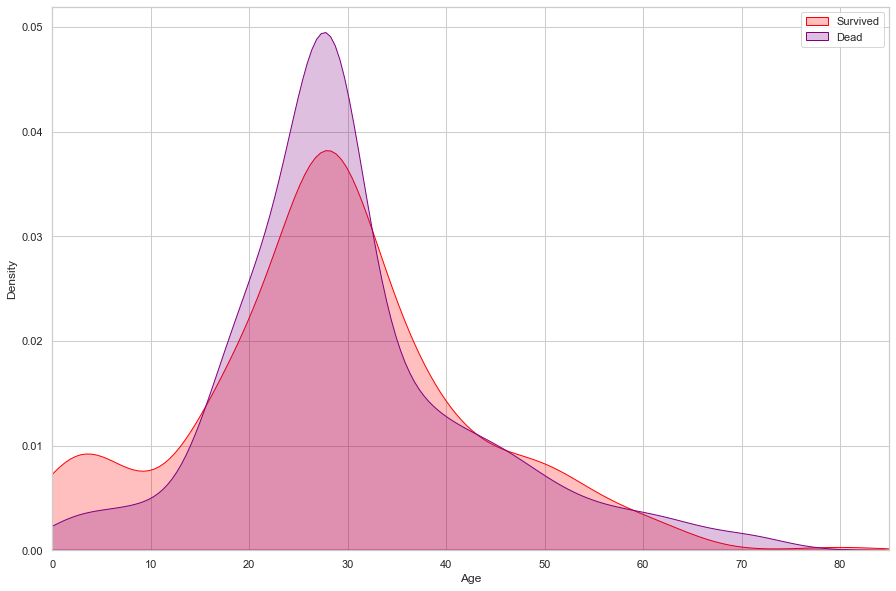

In [73]:
plt.figure(figsize=(15,10))
ax=sns.kdeplot(final_train['Age'][final_train.Survived==1] , color='red', shade=True)
sns.kdeplot(final_train['Age'][final_train.Survived==0] , color='purple', shade=True)
plt.legend(['Survived', "Dead"])
plt.xlim(0,85)
ax.set(xlabel='Age')
plt.show()


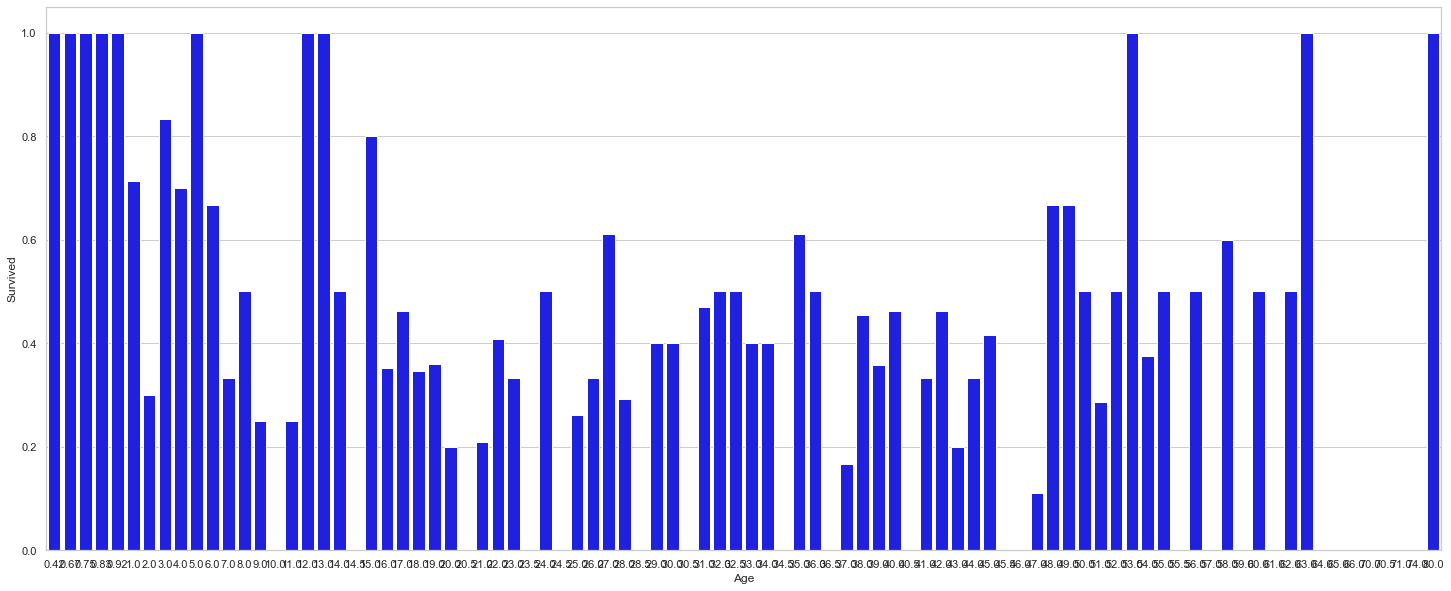

In [74]:
plt.figure(figsize=(25,10))
avg_survival_byage=final_train[['Age','Survived']].groupby(['Age'], as_index=False).mean()
g=sns.barplot(x='Age',y='Survived' , data=avg_survival_byage, color= 'blue' )
plt.show()

In [ ]:
# as age below 16 is very important for survival prediction, hence we'll include another column in the train and test dataset
#  called 'Minor'

In [75]:
final_train['IsMinor']=np.where((final_train['Age'])<=16,1,0)
final_test['IsMinor']=np.where((final_test['Age'])<=16,1,0)

In [76]:
final_train.head()

,Survived,Age,Fare,TravelAlone,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,IsMinor
0,0,22.0,7.2500,0,1,0,0,1,0,0,1,0
1,1,38.0,71.2833,0,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,0,0,0,1,1,0,0,0
4,0,35.0,8.0500,1,1,0,0,1,0,0,1,0


In [ ]:
# EDA for fare variable

<function matplotlib.pyplot.show(close=None, block=None)>

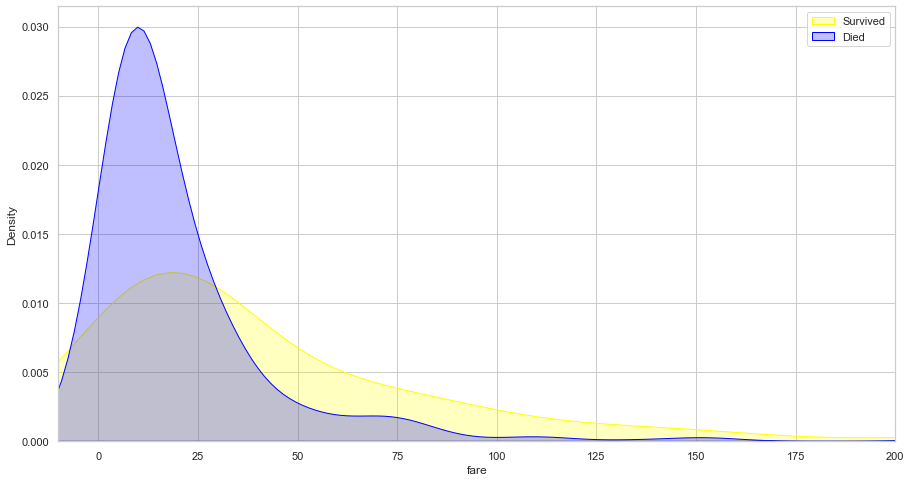

In [82]:
plt.figure(figsize=(15,8))
ax=sns.kdeplot(final_train['Fare'][final_train.Survived==1], color='yellow', shade=True)
sns.kdeplot(final_train['Fare'][final_train.Survived==0], color='blue', shade=True)
plt.legend(['Survived','Died'])
plt.xlabel('fare')
plt.xlim([-10,200])
plt.show

In [ ]:
# as blue is way greater ii=n the initial part this shows that lower fare payer had an greater chance of dying.

In [ ]:
# EDA of passenger class column

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

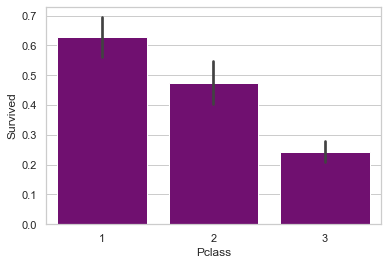

In [83]:
sns.barplot('Pclass','Survived', data= train_df, color='purple')

In [ ]:
# This shows that high payers survived more than poor peasants.

In [ ]:
# EDA for Embarked column

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

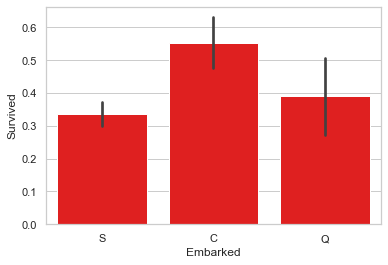

In [84]:
sns.barplot('Embarked','Survived', data=train_df, color='red')

In [ ]:
# EDA for travel alone


<AxesSubplot:xlabel='TravelAlone', ylabel='Survived'>

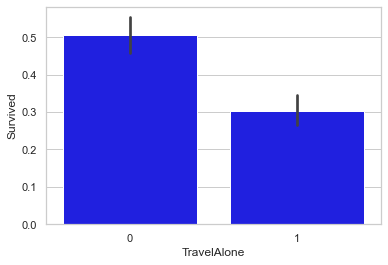

In [85]:
sns.barplot('TravelAlone', 'Survived', data=final_train, color='blue')

In [ ]:
# EDA for genders

<AxesSubplot:xlabel='Sex_male', ylabel='Survived'>

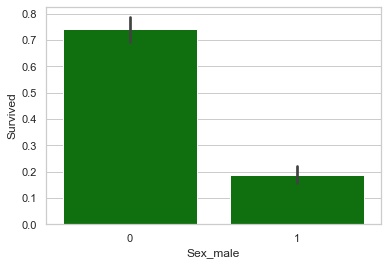

In [86]:
sns.barplot('Sex_male', 'Survived', data=final_train, color='green')

In [ ]:
# LOGISTIC REGRESSION

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [88]:
cols=['Age','Fare','TravelAlone','Pclass_1','Pclass_2','Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']
X=final_train[cols]
y=final_train['Survived']

In [89]:
model=LogisticRegression()

In [93]:
rfe=RFE(model,8)
rfe=rfe.fit(X,y)
print(X.columns[rfe.support_])

Index(['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C',
       'Embarked_S', 'Sex_male', 'IsMinor'],
      dtype='object')


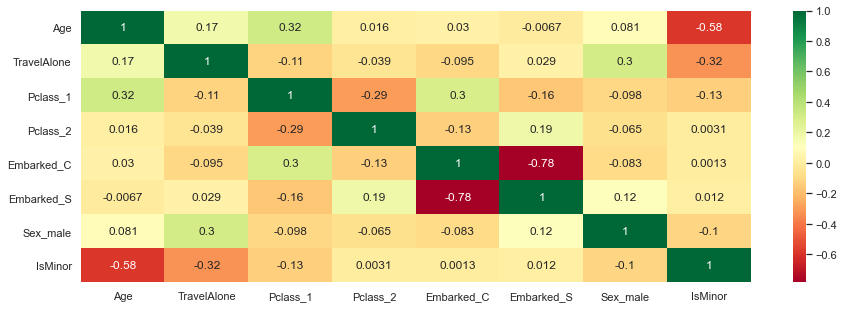

In [99]:
selected_features=['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C',
       'Embarked_S', 'Sex_male', 'IsMinor']
X=final_train[selected_features]

plt.subplots(figsize=(15,5))
sns.heatmap(X.corr(), annot=True,cmap='RdYlGn')
plt.xticks(rotation=False)
plt.show()

In [101]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score
from sklearn.metrics import confusion_matrix

In [102]:
X=final_train[selected_features]
y=final_train['Survived']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=2)

In [103]:
logreg= LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [104]:
precision_score(y_test,y_pred)

0.8333333333333334

In [105]:
recall_score(y_test,y_pred)

0.6329113924050633

In [106]:
accuracy_score(y_test,y_pred)

0.7821229050279329

In [108]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       100
           1       0.83      0.63      0.72        79

    accuracy                           0.78       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179



In [109]:
confusion_matrix(y_test,y_pred)

array([[90, 10],
       [29, 50]], dtype=int64)